In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import pingouin as pg
import openpyxl
from datetime import datetime

### Unemployment

In [328]:
df = pd.read_excel(r'C_Unemployment_NY(S).xlsx')
df

,Year,Period,Label,Observation Value
0,2000,M01,2000 Jan,431095
1,2000,M02,2000 Feb,425416
2,2000,M03,2000 Mar,421584
3,2000,M04,2000 Apr,419314
4,2000,M05,2000 May,417370
...,...,...,...,...
252,2021,M01,2021 Jan,815457
253,2021,M02,2021 Feb,825965
254,2021,M03,2021 Mar,804285
255,2021,M04,2021 Apr,774931


In [329]:
df1 = df.drop(columns = ['Period'])

In [330]:
df1.columns.values[2]='Unemployment'

In [331]:
df1.dtypes

Year             int64
Label           object
Unemployment     int64
dtype: object

In [332]:
df1['Label'] = pd.to_datetime(df1['Label'], format = '%Y %b')

In [333]:
df1['Year'] = pd.to_datetime(df1['Year'], format = '%Y')

In [334]:
df1.dtypes

Year            datetime64[ns]
Label           datetime64[ns]
Unemployment             int64
dtype: object

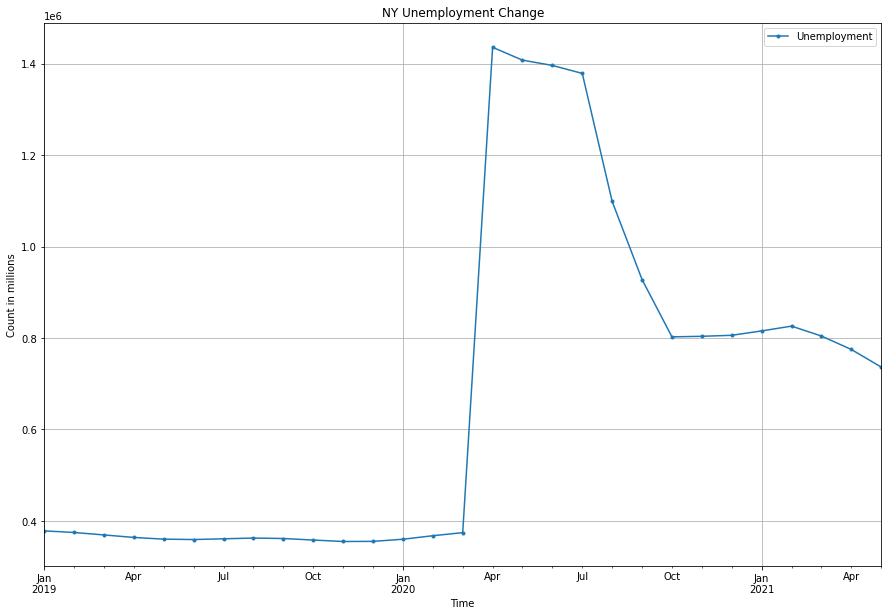

In [335]:
df1[228:].plot(x='Label', y='Unemployment', figsize=(15,10), grid=True, xlabel = 'Time',
              ylabel = 'Count in millions', title = 'NY Unemployment Change', style='.-')
plt.ticklabel_format(style='sci', axis='y', scilimits = (0,0))

In [336]:
unemp_max = df1.loc[228:250, ['Label', 'Unemployment']]
unemp_max

,Label,Unemployment
228,2019-01-01,378253
229,2019-02-01,374680
230,2019-03-01,369322
231,2019-04-01,363840
232,2019-05-01,360084
233,2019-06-01,359296
234,2019-07-01,360869
235,2019-08-01,362501
236,2019-09-01,361510
237,2019-10-01,358172


In [337]:
df1['Unemployment'][228:242].mean()

363308.14285714284

-------------------------------------------------------------------------------------------------------------------------------

### Employment

In [338]:
cf = pd.read_excel(r'C_Employment_NY(S).xlsx')
cf

,Year,Period,Label,Observation Value
0,2000,M01,2000 Jan,8722626
1,2000,M02,2000 Feb,8735957
2,2000,M03,2000 Mar,8743376
3,2000,M04,2000 Apr,8743469
4,2000,M05,2000 May,8736957
...,...,...,...,...
252,2021,M01,2021 Jan,8467554
253,2021,M02,2021 Feb,8463254
254,2021,M03,2021 Mar,8719375
255,2021,M04,2021 Apr,8727560


In [339]:
cf1 = cf.drop(columns = ['Period'])

In [340]:
cf1.columns.values[2]='Employment'

In [341]:
cf1['Label'] = pd.to_datetime(df1['Label'], format = '%Y %b')

In [342]:
cf1['Year'] = pd.to_datetime(df1['Year'], format = '%Y')

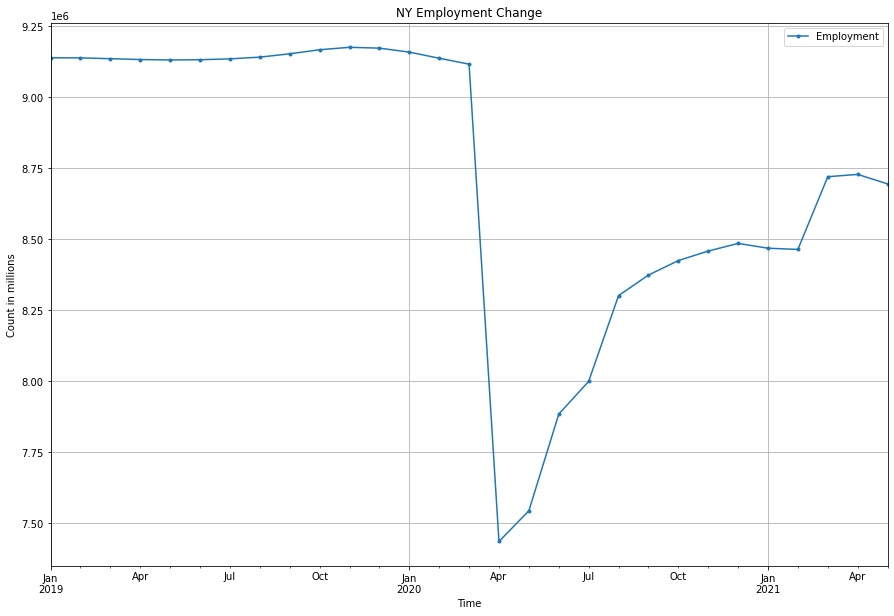

In [343]:
cf1[228:].plot(x='Label', y='Employment', figsize=(15,10), grid=True, xlabel = 'Time',
              ylabel = 'Count in millions', title = 'NY Employment Change', style='.-')
plt.ticklabel_format(style='sci', axis='y', scilimits = (0,0))

In [344]:
cf1

,Year,Label,Employment
0,2000-01-01,2000-01-01,8722626
1,2000-01-01,2000-02-01,8735957
2,2000-01-01,2000-03-01,8743376
3,2000-01-01,2000-04-01,8743469
4,2000-01-01,2000-05-01,8736957
...,...,...,...
252,2021-01-01,2021-01-01,8467554
253,2021-01-01,2021-02-01,8463254
254,2021-01-01,2021-03-01,8719375
255,2021-01-01,2021-04-01,8727560


In [345]:
empmax = cf1.loc[228:250, ['Label', 'Employment']]
empmax

,Label,Employment
228,2019-01-01,9138251
229,2019-02-01,9137837
230,2019-03-01,9135086
231,2019-04-01,9132034
232,2019-05-01,9130527
233,2019-06-01,9131332
234,2019-07-01,9134428
235,2019-08-01,9140474
236,2019-09-01,9152288
237,2019-10-01,9166554


In [346]:
cf1['Employment'][228:242].mean()

9145785.42857143

In [347]:
df1

,Year,Label,Unemployment
0,2000-01-01,2000-01-01,431095
1,2000-01-01,2000-02-01,425416
2,2000-01-01,2000-03-01,421584
3,2000-01-01,2000-04-01,419314
4,2000-01-01,2000-05-01,417370
...,...,...,...
252,2021-01-01,2021-01-01,815457
253,2021-01-01,2021-02-01,825965
254,2021-01-01,2021-03-01,804285
255,2021-01-01,2021-04-01,774931


### Employment vs Unemployment

In [348]:
df2 = df1
cf2 = cf1

cf2.columns.values[2]='Observation2'
cf2

In [349]:
df2

,Year,Label,Unemployment
0,2000-01-01,2000-01-01,431095
1,2000-01-01,2000-02-01,425416
2,2000-01-01,2000-03-01,421584
3,2000-01-01,2000-04-01,419314
4,2000-01-01,2000-05-01,417370
...,...,...,...
252,2021-01-01,2021-01-01,815457
253,2021-01-01,2021-02-01,825965
254,2021-01-01,2021-03-01,804285
255,2021-01-01,2021-04-01,774931


In [350]:
#insert Employment column from cf2 to df2
m = cf2["Employment"]
df2.insert(2, 'Employment', m)

In [351]:
#Now df has both Emplyment and Unmeployment
df2

,Year,Label,Employment,Unemployment
0,2000-01-01,2000-01-01,8722626,431095
1,2000-01-01,2000-02-01,8735957,425416
2,2000-01-01,2000-03-01,8743376,421584
3,2000-01-01,2000-04-01,8743469,419314
4,2000-01-01,2000-05-01,8736957,417370
...,...,...,...,...
252,2021-01-01,2021-01-01,8467554,815457
253,2021-01-01,2021-02-01,8463254,825965
254,2021-01-01,2021-03-01,8719375,804285
255,2021-01-01,2021-04-01,8727560,774931


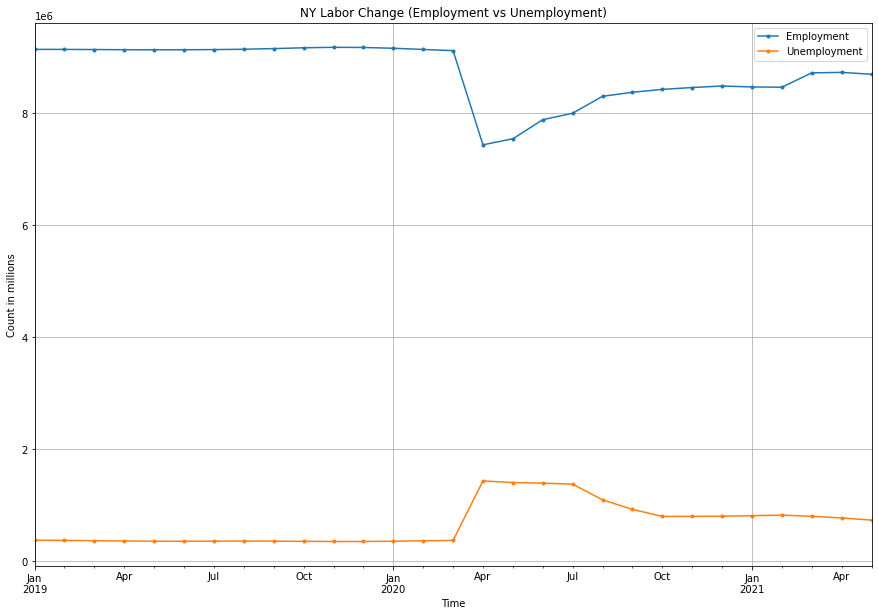

In [352]:
#Plot them both
df2[228:].plot(x='Label', y = ['Employment', 'Unemployment'], figsize=(15,10), grid=True, xlabel = 'Time',
              ylabel = 'Count in millions', title = 'NY Labor Change (Employment vs Unemployment)', style='.-')
plt.ticklabel_format(style='sci', axis='y', scilimits = (0,0)) #code to edit the y-axis sci notation

_______________________________________________________________________________________________________________________________

### Labor Force

In [353]:
#Importing Labor Force data and naming it ef
ef = pd.read_excel(r'C_Laborforce_NY (S).xlsx')
ef

,Year,Period,Label,Observation Value
0,2000,M01,2000 Jan,9153721
1,2000,M02,2000 Feb,9161373
2,2000,M03,2000 Mar,9164960
3,2000,M04,2000 Apr,9162783
4,2000,M05,2000 May,9154327
...,...,...,...,...
252,2021,M01,2021 Jan,9283011
253,2021,M02,2021 Feb,9289219
254,2021,M03,2021 Mar,9523660
255,2021,M04,2021 Apr,9502491


In [354]:
#cleaning ef
ef1 = ef.drop(columns = ['Period']) #dropping the 'Period' column
ef1.columns.values[2]='Labor Force' #Renaming 'Observation Value' to 'Labor Force' (or the counts of the data for LF)

#Changing 'Label' and 'Year' columns to date time format
ef1['Label'] = pd.to_datetime(df1['Label'], format = '%Y %b')
ef1['Year'] = pd.to_datetime(df1['Year'], format = '%Y')

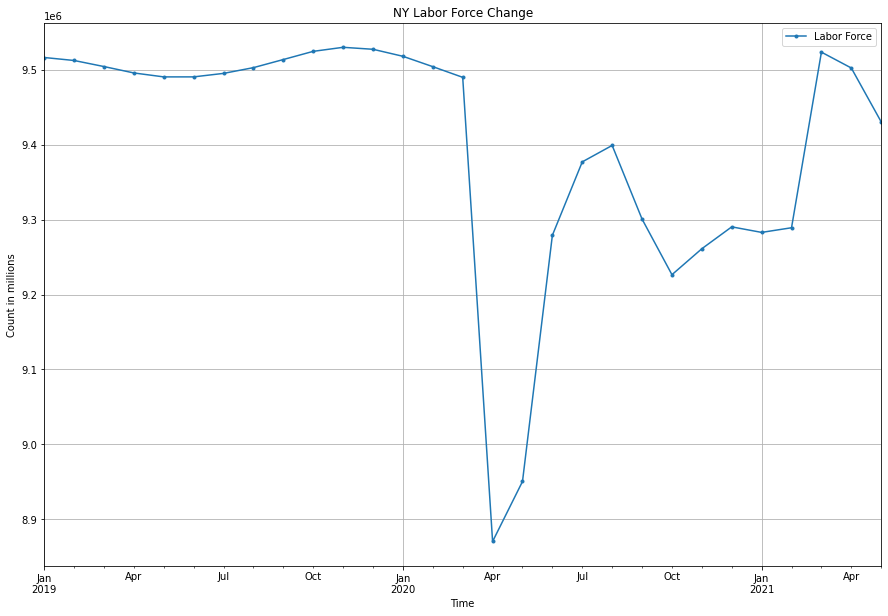

In [355]:
#Plotting LF
ef1[228:].plot(x='Label', y='Labor Force', figsize=(15,10), grid=True, xlabel = 'Time',
              ylabel = 'Count in millions', title = 'NY Labor Force Change', style='.-')
plt.ticklabel_format(style='sci', axis='y', scilimits = (0,0))

In [356]:
lbmax = ef1.loc[228:250, ['Label', 'Labor Force']]

In [357]:
lbmax

,Label,Labor Force
228,2019-01-01,9516504
229,2019-02-01,9512517
230,2019-03-01,9504408
231,2019-04-01,9495874
232,2019-05-01,9490611
233,2019-06-01,9490628
234,2019-07-01,9495297
235,2019-08-01,9502975
236,2019-09-01,9513798
237,2019-10-01,9524726


Based on Date above, in March the Labor Force numbers were 9490040 then suddenly dropped to 8870365 by April

In [358]:
ef1['Labor Force'][228:242].mean()

9509093.57142857

In [359]:
#making copies of ef1 so I don't ruin it
ef2 = ef1

In [360]:
#Inserting the 'Labor Force' column into df2
n = ef2["Labor Force"]
df2.insert(2, 'Labor Force', n) #(.insert(position in new dataset, name of column, column being inserted))

In [361]:
df2

,Year,Label,Labor Force,Employment,Unemployment
0,2000-01-01,2000-01-01,9153721,8722626,431095
1,2000-01-01,2000-02-01,9161373,8735957,425416
2,2000-01-01,2000-03-01,9164960,8743376,421584
3,2000-01-01,2000-04-01,9162783,8743469,419314
4,2000-01-01,2000-05-01,9154327,8736957,417370
...,...,...,...,...,...
252,2021-01-01,2021-01-01,9283011,8467554,815457
253,2021-01-01,2021-02-01,9289219,8463254,825965
254,2021-01-01,2021-03-01,9523660,8719375,804285
255,2021-01-01,2021-04-01,9502491,8727560,774931


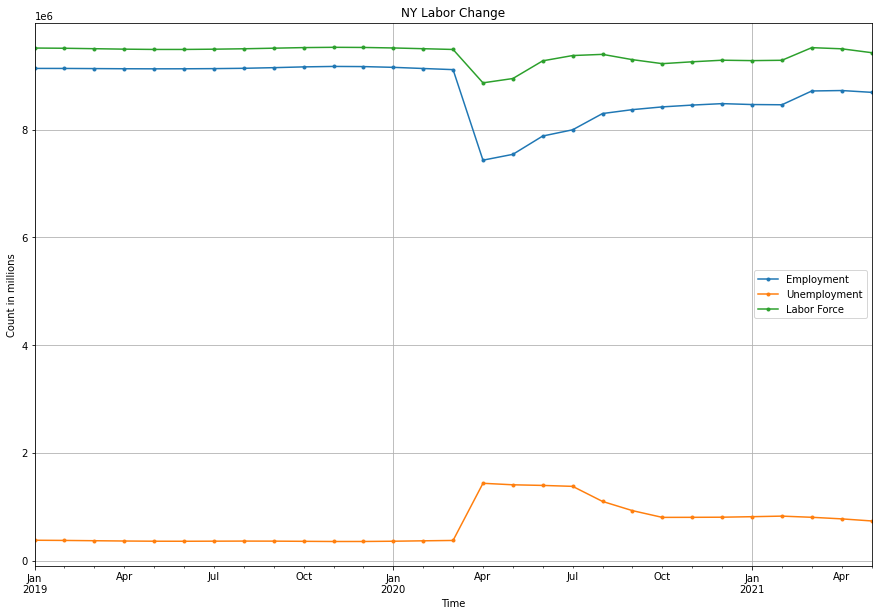

In [362]:
#Plot of all datasets
df2[228:].plot(x='Label', y = ['Employment', 'Unemployment', 'Labor Force'], figsize=(15,10), grid=True, xlabel = 'Time',
              ylabel = 'Count in millions', title = 'NY Labor Change', style='.-')
plt.ticklabel_format(style='sci', axis='y', scilimits = (0,0))

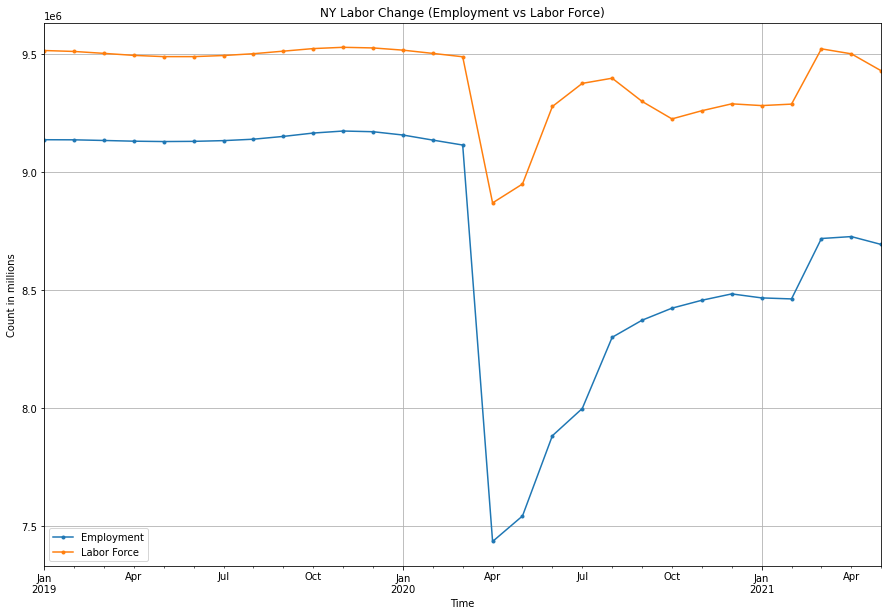

In [363]:
labor_emp = df2[228:].plot(x='Label', y = ['Employment', 'Labor Force'], figsize=(15, 10), grid=True, xlabel = 'Time',
              ylabel = 'Count in millions', title = 'NY Labor Change (Employment vs Labor Force)', style='.-')
plt.ticklabel_format(style='sci', axis='y')

_________________________________________________________________________________________________________________________

### Heatmap

Couldn't use crosstab, so trying to get the relative frequency of all numbers for the heatmap in different way

In [364]:
heat = df2.drop(columns = ['Year'])
heat

,Label,Labor Force,Employment,Unemployment
0,2000-01-01,9153721,8722626,431095
1,2000-02-01,9161373,8735957,425416
2,2000-03-01,9164960,8743376,421584
3,2000-04-01,9162783,8743469,419314
4,2000-05-01,9154327,8736957,417370
...,...,...,...,...
252,2021-01-01,9283011,8467554,815457
253,2021-02-01,9289219,8463254,825965
254,2021-03-01,9523660,8719375,804285
255,2021-04-01,9502491,8727560,774931


In [365]:
heat[242:257]

,Label,Labor Force,Employment,Unemployment
242,2020-03-01,9490040,9115724,374316
243,2020-04-01,8870365,7434677,1435688
244,2020-05-01,8950469,7542872,1407597
245,2020-06-01,9279154,7883108,1396046
246,2020-07-01,9377175,7998562,1378613
247,2020-08-01,9399119,8300511,1098608
248,2020-09-01,9300792,8372958,927834
249,2020-10-01,9226555,8424046,802509
250,2020-11-01,9261209,8457527,803682
251,2020-12-01,9290419,8484485,805934


In [366]:
heat.sum()
#heat2 = pd.DataFrame(heat2)

Labor Force     2433216606
Employment      2283717051
Unemployment     149499555
dtype: int64

In [367]:
#3 lists in which each for loop takes the relative frequency of each number and adds it back to the lists
laborf = []
emp = []
unemp = []
for i in heat['Labor Force']:
    m = (i/heat['Labor Force'].sum())*100
    laborf.append(m)

for i in heat['Employment']:
    m = (i/heat['Employment'].sum())*100
    emp.append(m)
    
for i in heat['Unemployment']:
    m = (i/heat['Unemployment'].sum())*100
    unemp.append(m)

In [368]:
#combine lists by zipping them
zip_heat = list(zip(laborf, emp, unemp))

In [369]:
#converting the lists into a DataFrame for manipulation
dheat = pd.DataFrame(zip_heat,
                  columns = ['Labor Force', 'Employment', 'Unemployment'])

In [370]:
dheat

,Labor Force,Employment,Unemployment
0,0.376198,0.381949,0.288359
1,0.376513,0.382532,0.284560
2,0.376660,0.382857,0.281997
3,0.376571,0.382861,0.280478
4,0.376223,0.382576,0.279178
...,...,...,...
252,0.381512,0.370779,0.545458
253,0.381767,0.370591,0.552487
254,0.391402,0.381806,0.537985
255,0.390532,0.382165,0.518350


In [371]:
#Take the 'Label' column from df and add it to 'dheat' dataframe
f = df["Label"]
dheat.insert(2, 'Label', f) #.insert(position to insert column, name of column, column inserted)

In [372]:
fin_heat = dheat.set_index('Label')
fin_heat

,Labor Force,Employment,Unemployment
Label,,,
2000 Jan,0.376198,0.381949,0.288359
2000 Feb,0.376513,0.382532,0.284560
2000 Mar,0.376660,0.382857,0.281997
2000 Apr,0.376571,0.382861,0.280478
2000 May,0.376223,0.382576,0.279178
...,...,...,...
2021 Jan,0.381512,0.370779,0.545458
2021 Feb,0.381767,0.370591,0.552487
2021 Mar,0.391402,0.381806,0.537985


Text(0.5, 1.0, 'Ny Labor Change Heatmap')

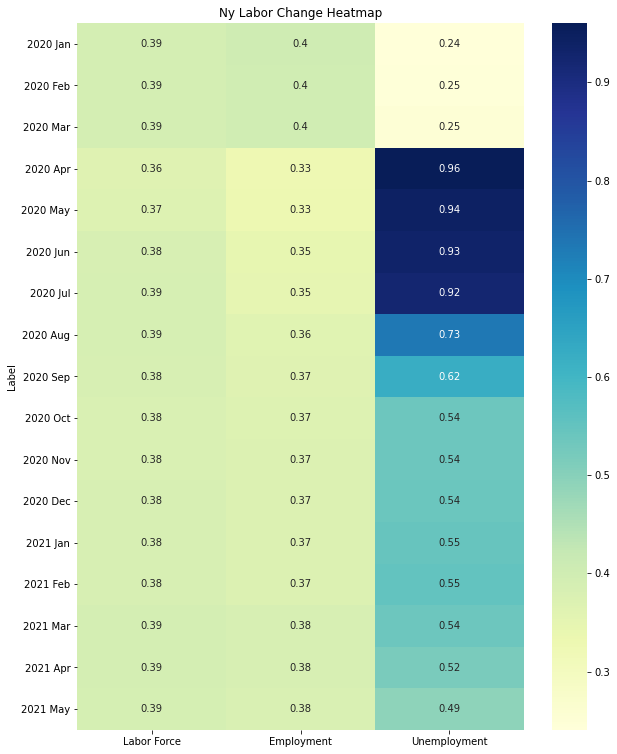

In [373]:
plt.figure(figsize=(10, 13))
sns.heatmap(fin_heat[240:], cmap="YlGnBu", annot=True)#annot adds the numbers to the map
plt.title("Ny Labor Change Heatmap")

In [374]:
small_fin_heat = fin_heat.drop(columns = ['Unemployment'])
small_fin_heat

,Labor Force,Employment
Label,,
2000 Jan,0.376198,0.381949
2000 Feb,0.376513,0.382532
2000 Mar,0.376660,0.382857
2000 Apr,0.376571,0.382861
2000 May,0.376223,0.382576
...,...,...
2021 Jan,0.381512,0.370779
2021 Feb,0.381767,0.370591
2021 Mar,0.391402,0.381806


Text(0.5, 1.0, 'Ny Labor Force & Employment Heatmap')

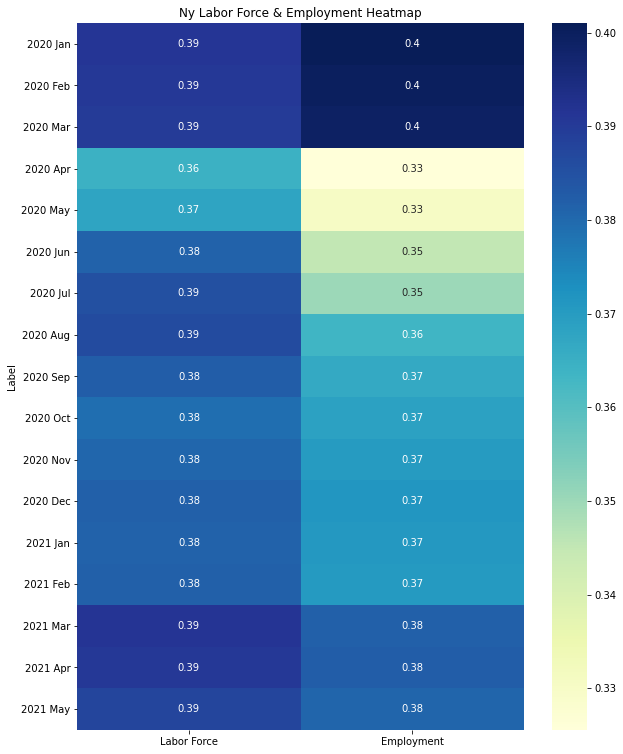

In [375]:
plt.figure(figsize=(10, 13))
sns.heatmap(small_fin_heat[240:], cmap="YlGnBu", annot=True)#annot adds the numbers to the map
plt.title("Ny Labor Force & Employment Heatmap")

Text(0.5, 1.0, 'Ny Labor Change Heatmap')

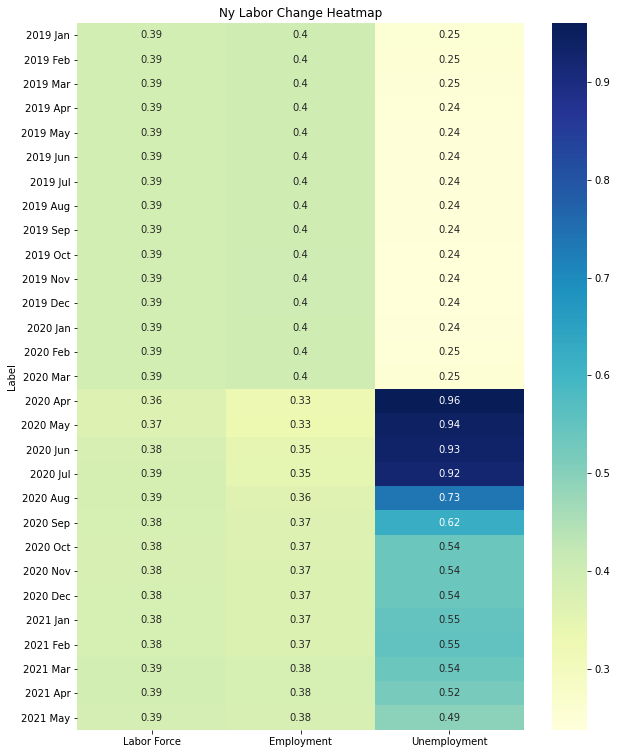

In [376]:
plt.figure(figsize=(10, 13))
sns.heatmap(fin_heat[228:], cmap="YlGnBu", annot=True)#annot adds the numbers to the map
plt.title("Ny Labor Change Heatmap")

Text(0.5, 1.0, 'Ny Labor Force & Employment Heatmap')

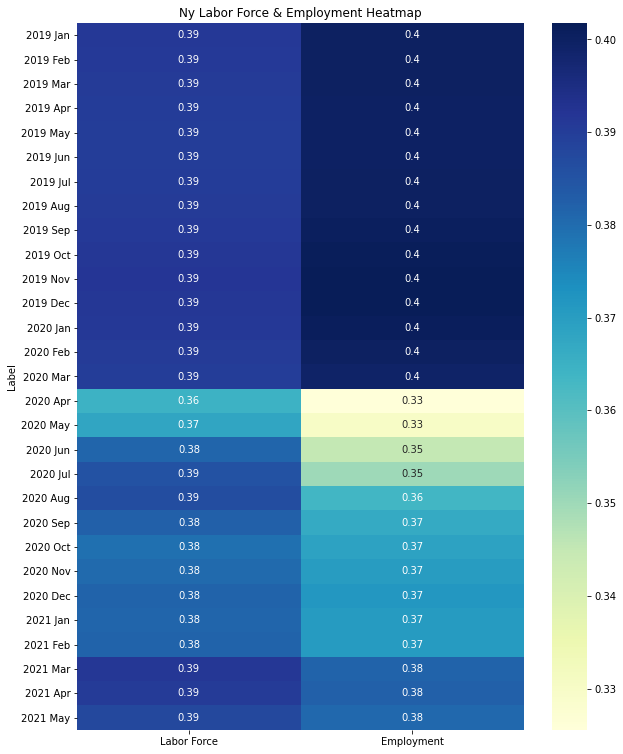

In [377]:
plt.figure(figsize=(10, 13))
sns.heatmap(small_fin_heat[228:], cmap="YlGnBu", annot=True)#annot adds the numbers to the map
plt.title("Ny Labor Force & Employment Heatmap")

^^regresar^^ -----------------------------------------------------------------------------------------------------------------

### Bar Graphs

In [378]:
#copy the heat dataframe and
#melt it so the dataframe is vertical and the columns get assigneed to the different labels
melted = heat.melt(id_vars = 'Label')

In [379]:
#group by year (keeps the datetime format)
melted.groupby(melted.Label.dt.year)

In [380]:
#does the same thing as above
melted.groupby(melted['Label'].dt.year)

In [381]:
#reassigns the 'Label' column info to just its year (the datetime format disappears and becomes an int)
melted['Label'] = melted['Label'].dt.year

In [382]:
melted

,Label,variable,value
0,2000,Labor Force,9153721
1,2000,Labor Force,9161373
2,2000,Labor Force,9164960
3,2000,Labor Force,9162783
4,2000,Labor Force,9154327
...,...,...,...
766,2021,Unemployment,815457
767,2021,Unemployment,825965
768,2021,Unemployment,804285
769,2021,Unemployment,774931


In [383]:
melted.rename(columns = {'Label':'Year', 'variable':'Status', 'value':'Count'}, inplace = True)

In [384]:
melted.dtypes

Year       int64
Status    object
Count      int64
dtype: object

In [385]:
#takes all the year and status columns and adds the third columns values to combine them into one per year
grouped = melted.groupby(['Year', 'Status'], as_index=False).agg('sum')

In [386]:
grouped

,Year,Status,Count
0,2000,Employment,104731065
1,2000,Labor Force,109678950
2,2000,Unemployment,4947885
3,2001,Employment,104159962
4,2001,Labor Force,109509793
...,...,...,...
61,2020,Labor Force,111467683
62,2020,Unemployment,11158351
63,2021,Employment,43071872
64,2021,Labor Force,47028930


In [387]:
grouped.dtypes

Year       int64
Status    object
Count      int64
dtype: object

In [388]:
grouped[grouped['Year'] == 2019]

,Year,Status,Count
57,2019,Employment,109746134
58,2019,Labor Force,114104924
59,2019,Unemployment,4358790


#will change the 'Label' now 'Year' column back into datetimeformat, but that will make it appear like that in the graph
grouped['Year'] = pd.to_datetime(grouped['Year'], format = '%Y')
#not really need to change it since 

Text(0, 0.5, 'Counts in millions')

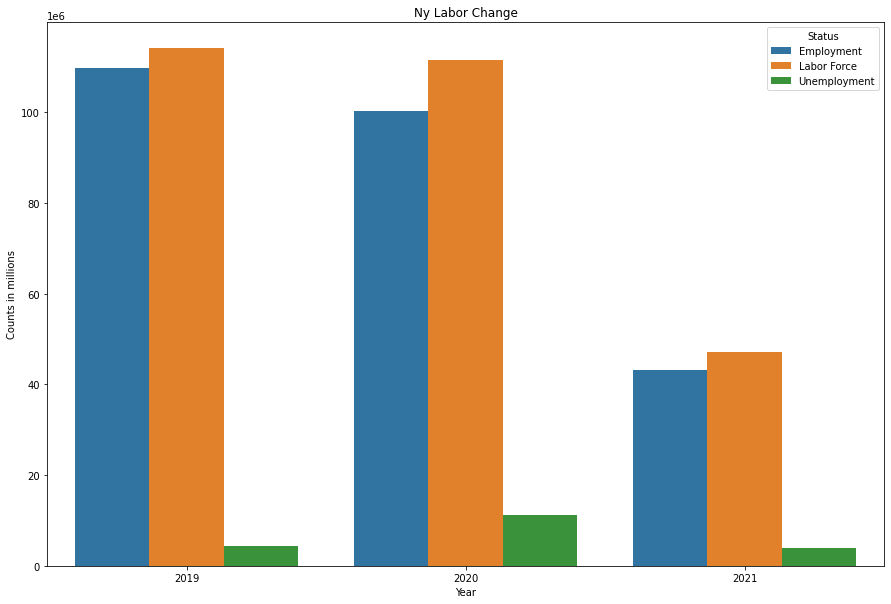

In [389]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'Year', 
    y = 'Count',
    hue = 'Status'       ,
    data=grouped[57:],
    ci=None )
plt.title("Ny Labor Change")
plt.ticklabel_format(style='sci', axis='y', scilimits = (6,6))
plt.ylabel('Counts in millions')

-------^barplot by year

#### Attempt to create the barplot by month

In [390]:
omelt = heat

In [391]:
omelt = omelt.drop(columns = ['Label'])

In [392]:
omelt.insert(2, 'Label', f)

In [393]:
gm = omelt.melt(id_vars = 'Label')

In [394]:
gm

,Label,variable,value
0,2000 Jan,Labor Force,9153721
1,2000 Feb,Labor Force,9161373
2,2000 Mar,Labor Force,9164960
3,2000 Apr,Labor Force,9162783
4,2000 May,Labor Force,9154327
...,...,...,...
766,2021 Jan,Unemployment,815457
767,2021 Feb,Unemployment,825965
768,2021 Mar,Unemployment,804285
769,2021 Apr,Unemployment,774931


In [395]:
gomelt = gm.groupby(['variable', 'Label'], sort = False)['value'].aggregate(np.sum).reset_index()

In [396]:
gomelt = gm.sort_index(level = ['Label', 'variable'])

In [397]:
gomelt

,Label,variable,value
0,2000 Jan,Labor Force,9153721
1,2000 Feb,Labor Force,9161373
2,2000 Mar,Labor Force,9164960
3,2000 Apr,Labor Force,9162783
4,2000 May,Labor Force,9154327
...,...,...,...
766,2021 Jan,Unemployment,815457
767,2021 Feb,Unemployment,825965
768,2021 Mar,Unemployment,804285
769,2021 Apr,Unemployment,774931


<AxesSubplot:xlabel='Label', ylabel='value'>

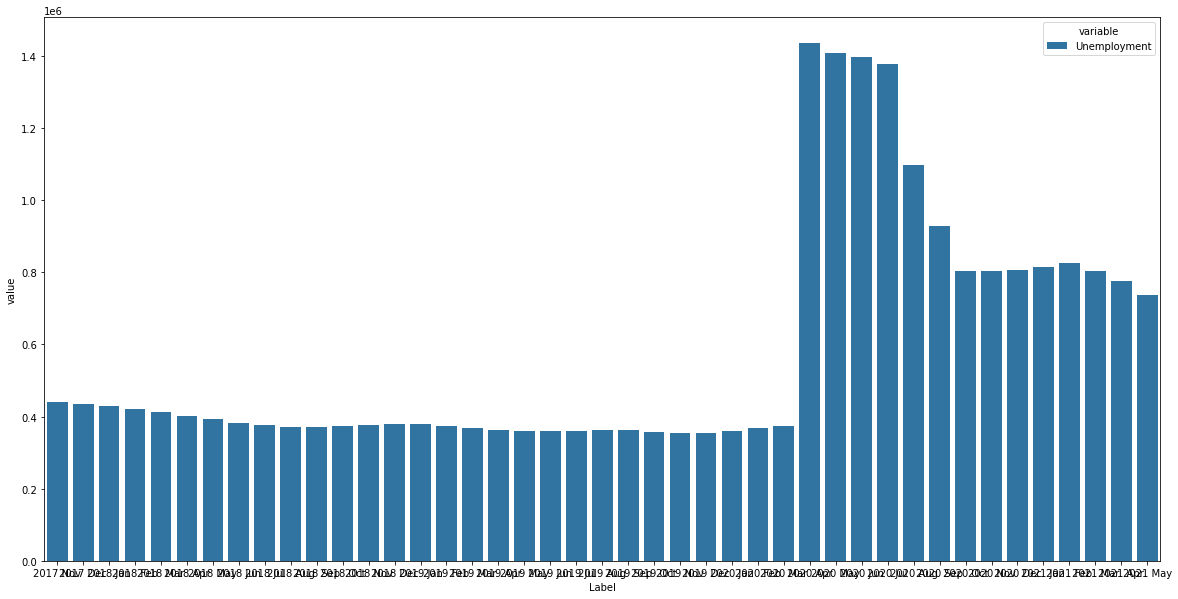

In [398]:
plt.figure(figsize=(20, 10))
sns.barplot(x = 'Label', 
    y = 'value',
    hue = 'variable'       ,
    data=gomelt[728:],
    ci=None )

______________________________________________________________________________________________________________________________

### NY Covid-19 Cases

In [399]:
hf = pd.read_csv('../project_data/NY_State_Statewide_COVID-19_Testing.csv')
hf

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,03/01/2020,Albany,0,0,0,0
1,03/02/2020,Albany,0,0,0,0
2,03/03/2020,Albany,0,0,0,0
3,03/04/2020,Albany,0,0,0,0
4,03/05/2020,Albany,0,0,3,3
...,...,...,...,...,...,...
30561,07/02/2021,Yates,0,"1,180",62,"48,229"
30562,07/03/2021,Yates,0,"1,180",38,"48,267"
30563,07/04/2021,Yates,0,"1,180",19,"48,286"
30564,07/05/2021,Yates,0,"1,180",20,"48,306"


In [400]:
hf.dtypes

Test Date                               object
County                                  object
New Positives                           object
Cumulative Number of Positives          object
Total Number of Tests Performed         object
Cumulative Number of Tests Performed    object
dtype: object

In [401]:
hf = hf.drop(columns = ['Total Number of Tests Performed'])
hf = hf.drop(columns = ['Cumulative Number of Tests Performed'])

In [402]:
hf['Test Date'] = pd.to_datetime(hf['Test Date'], format = '%m/%d/%Y')

In [403]:
hf

,Test Date,County,New Positives,Cumulative Number of Positives
0,2020-03-01,Albany,0,0
1,2020-03-02,Albany,0,0
2,2020-03-03,Albany,0,0
3,2020-03-04,Albany,0,0
4,2020-03-05,Albany,0,0
...,...,...,...,...
30561,2021-07-02,Yates,0,"1,180"
30562,2021-07-03,Yates,0,"1,180"
30563,2021-07-04,Yates,0,"1,180"
30564,2021-07-05,Yates,0,"1,180"


In [404]:
hf1 = hf

In [405]:
hf1 = hf1.drop(columns = ['County'])

In [406]:
hf1 = hf1.replace(',','', regex=True)

In [407]:
hf1

,Test Date,New Positives,Cumulative Number of Positives
0,2020-03-01,0,0
1,2020-03-02,0,0
2,2020-03-03,0,0
3,2020-03-04,0,0
4,2020-03-05,0,0
...,...,...,...
30561,2021-07-02,0,1180
30562,2021-07-03,0,1180
30563,2021-07-04,0,1180
30564,2021-07-05,0,1180


In [408]:
c = hf1.select_dtypes(object).columns
hf1[c] = hf1[c].apply(pd.to_numeric,errors='coerce')

In [409]:
hf2 = hf1.set_index('Test Date')

In [410]:
g = hf2.groupby([(hf2.index.year),(hf2.index.month)]).sum()

In [411]:
g

New Positives  Cumulative Number of Positives
Test Date Test Date                                               
2020      3                  83712                          540886
          4                 224602                         6453045
          5                  63397                        10756688
          6                  22368                        11535860
          7                  21688                        12566241
          8                  19743                        13202619
          9                  24521                        13418678
          10                 49704                        14990399
          11                145530                        17166929
          12                335446                        25377635
2021      1                 428453                        37906091
          2                 217516                        42995846
          3                 230640                        54322156
          4                 168899                        59013903
          5                  49362                        64089660
          6                  12390                        62783014
          7                   2446                        12596696

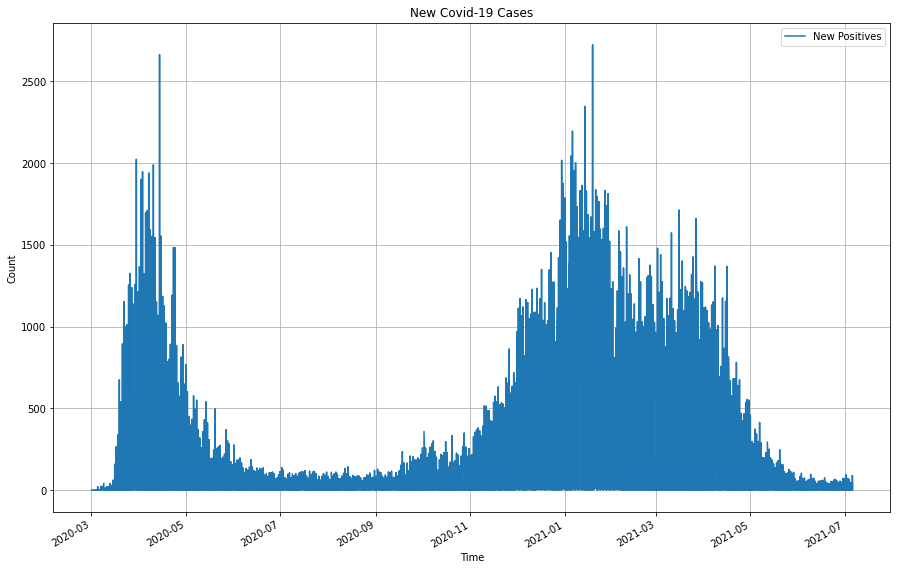

In [412]:
hf2.plot(y = 'New Positives', figsize=(15, 10), grid=True, xlabel = 'Time',
              ylabel = 'Count', title = 'New Covid-19 Cases', kind = 'line')
plt.ticklabel_format(style='sci', axis='y')

In [413]:
hf3 = hf1

In [414]:
hf3['month_year'] = pd.to_datetime(hf1['Test Date']).dt.to_period('M').astype(str)

In [415]:
hf3 = hf3.drop(columns = ['Test Date'])

In [416]:
hf3['month_year'] = pd.to_datetime(hf3['month_year'], format = '%Y-%m')

In [417]:
hf4 = hf3.groupby(['month_year']).agg('sum')

In [418]:
hf4

,New Positives,Cumulative Number of Positives
month_year,,
2020-03-01,83712,540886
2020-04-01,224602,6453045
2020-05-01,63397,10756688
2020-06-01,22368,11535860
2020-07-01,21688,12566241
2020-08-01,19743,13202619
2020-09-01,24521,13418678
2020-10-01,49704,14990399
2020-11-01,145530,17166929


<AxesSubplot:title={'center':'New Covid-19 Cases'}, xlabel='Time', ylabel='Count'>

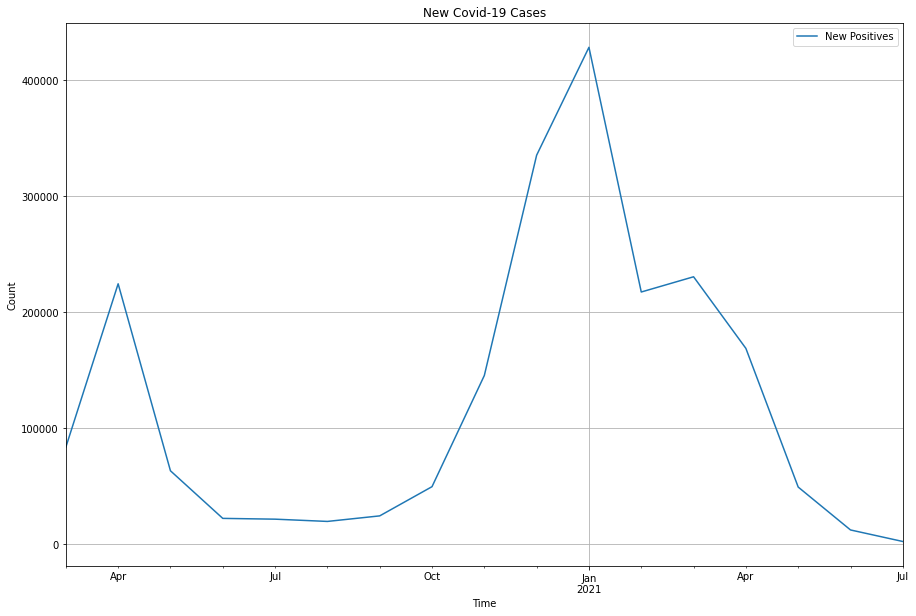

In [419]:
hf4.plot(y = 'New Positives', figsize=(15, 10), grid=True, xlabel = 'Time',
              ylabel = 'Count', title = 'New Covid-19 Cases', kind = 'line')

### Covid Cases vs Employment. Unemployment, Labor Force, CPI

In [420]:
hf5 = hf4

In [421]:
hf6 = hf5.reset_index()

In [422]:
emp_insert = heat.iloc[242:257, [2]].reset_index()

In [423]:
k = emp_insert["Employment"]
hf6.insert(2, 'Employment', k)

In [424]:
emp_insert

,index,Employment
0,242,9115724
1,243,7434677
2,244,7542872
3,245,7883108
4,246,7998562
5,247,8300511
6,248,8372958
7,249,8424046
8,250,8457527
9,251,8484485


In [425]:
hf6

,month_year,New Positives,Employment,Cumulative Number of Positives
0,2020-03-01,83712,9115724.0,540886
1,2020-04-01,224602,7434677.0,6453045
2,2020-05-01,63397,7542872.0,10756688
3,2020-06-01,22368,7883108.0,11535860
4,2020-07-01,21688,7998562.0,12566241
5,2020-08-01,19743,8300511.0,13202619
6,2020-09-01,24521,8372958.0,13418678
7,2020-10-01,49704,8424046.0,14990399
8,2020-11-01,145530,8457527.0,17166929
9,2020-12-01,335446,8484485.0,25377635


<AxesSubplot:title={'center':'New Covid-19 Cases'}, xlabel='Time', ylabel='Count'>

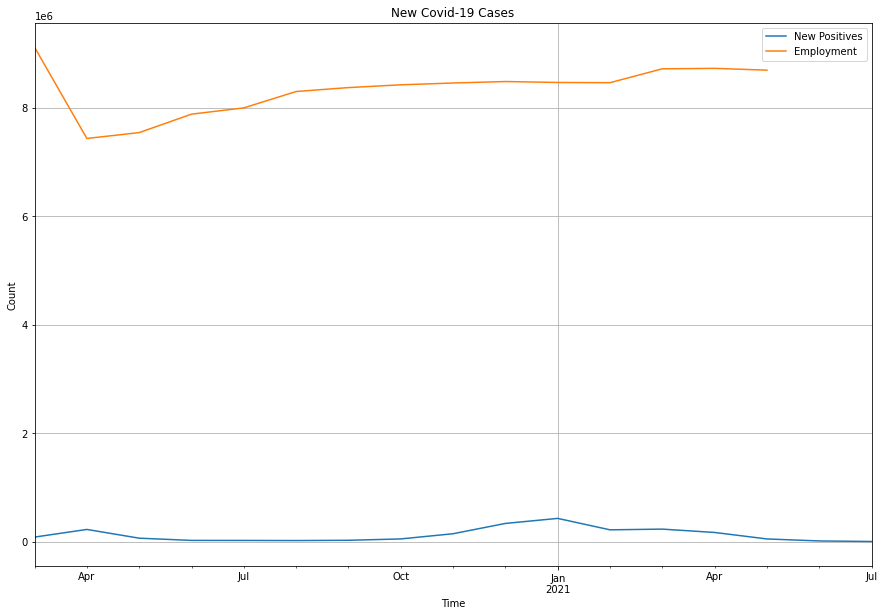

In [426]:
hf6.plot(x = 'month_year', y = ['New Positives', 'Employment'], figsize=(15, 10), grid=True, xlabel = 'Time',
              ylabel = 'Count', title = 'New Covid-19 Cases', kind = 'line')

<AxesSubplot:title={'center':'New Covid-19 Cases'}, xlabel='Employment', ylabel='[New Positives]'>

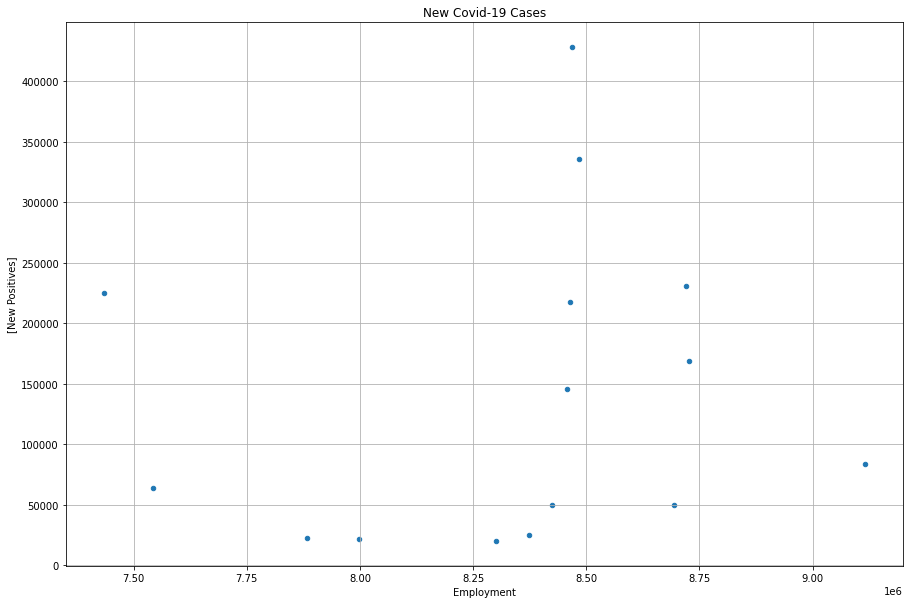

In [427]:
hf6.plot(x =  'Employment', y =['New Positives'][0:15], figsize=(15, 10), grid=True, title = 'New Covid-19 Cases', kind = 'scatter')

In [428]:
emp_cor = np.corrcoef(hf6['Employment'][0:14], hf6['New Positives'][0:14])

In [429]:
emp_cor

array([[1.        , 0.19633073],
       [0.19633073, 1.        ]])

### Covid Per County

In [430]:
cov_count = hf

In [431]:
cov_count = cov_count.replace(',','', regex=True)

In [432]:
cov_count = cov_count.drop(columns = ['Cumulative Number of Positives'])

In [433]:
cov_count['New Positives'] = cov_count['New Positives'].astype(int)

In [434]:
cov_count

,Test Date,County,New Positives
0,2020-03-01,Albany,0
1,2020-03-02,Albany,0
2,2020-03-03,Albany,0
3,2020-03-04,Albany,0
4,2020-03-05,Albany,0
...,...,...,...
30561,2021-07-02,Yates,0
30562,2021-07-03,Yates,0
30563,2021-07-04,Yates,0
30564,2021-07-05,Yates,0


In [435]:
l = hf3["month_year"]
cov_count.insert(2, 'Month_year', l)

In [436]:
cov_count = cov_count.drop(columns = ['Test Date'])

In [437]:
cov_count

,County,Month_year,New Positives
0,Albany,2020-03-01,0
1,Albany,2020-03-01,0
2,Albany,2020-03-01,0
3,Albany,2020-03-01,0
4,Albany,2020-03-01,0
...,...,...,...
30561,Yates,2021-07-01,0
30562,Yates,2021-07-01,0
30563,Yates,2021-07-01,0
30564,Yates,2021-07-01,0


In [438]:
cov_count.dtypes

County                   object
Month_year       datetime64[ns]
New Positives             int64
dtype: object

In [439]:
cov_count = cov_count.groupby(['County', 'Month_year'], as_index=False).agg('sum')

In [440]:
cov_count

,County,Month_year,New Positives
0,Albany,2020-03-01,240
1,Albany,2020-04-01,964
2,Albany,2020-05-01,678
3,Albany,2020-06-01,230
4,Albany,2020-07-01,403
...,...,...,...
1049,Yates,2021-03-01,46
1050,Yates,2021-04-01,81
1051,Yates,2021-05-01,36
1052,Yates,2021-06-01,3


<AxesSubplot:xlabel='Month_year', ylabel='New Positives'>

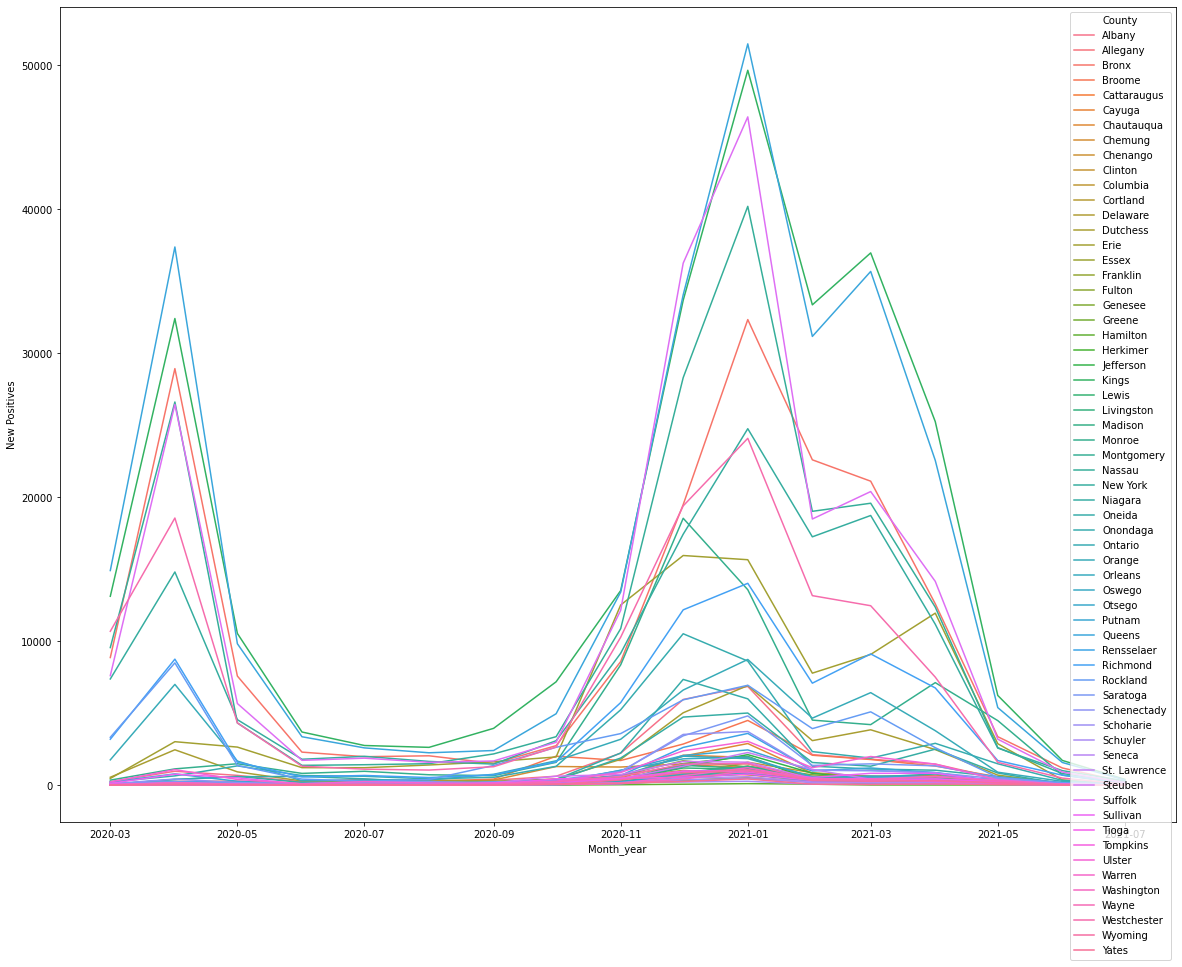

In [441]:
plt.figure(figsize=(20, 15))
sns.lineplot(x = 'Month_year', y = 'New Positives', hue = 'County', data = cov_count)

Text(0, 0.5, 'Counts in millions')

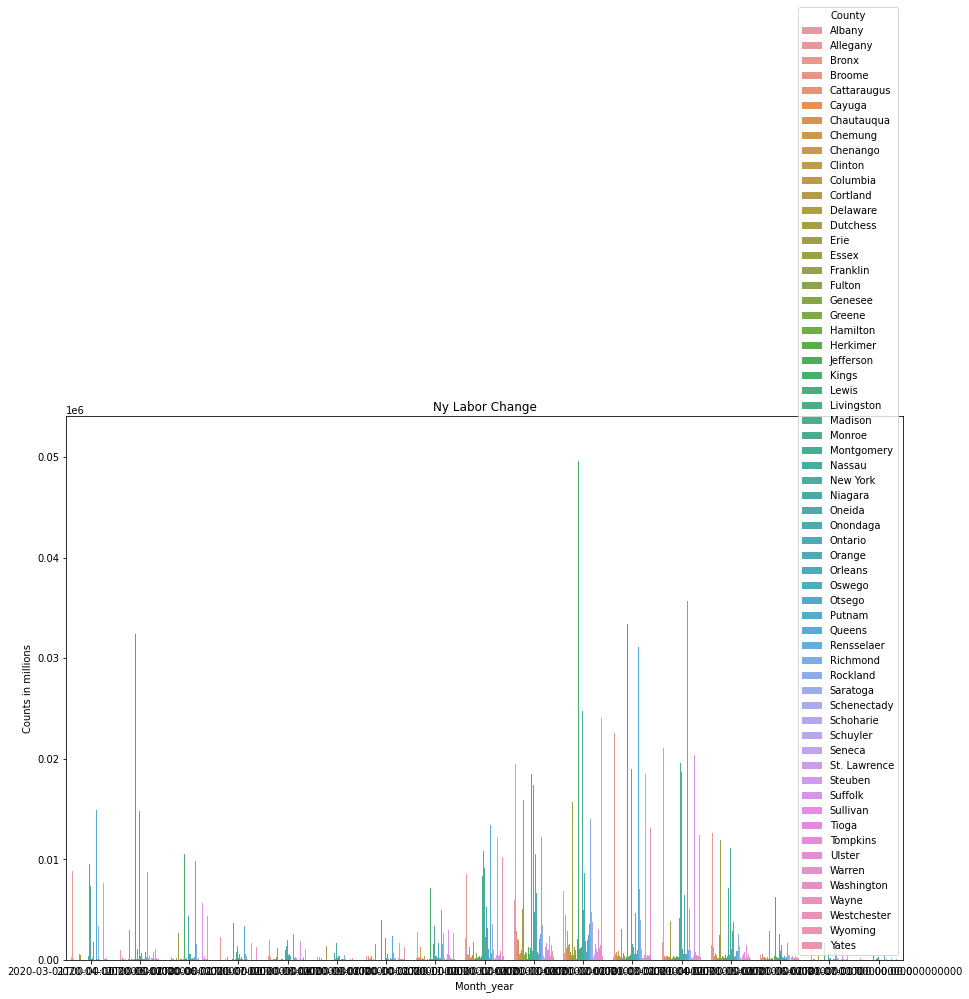

In [442]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'Month_year', 
    y = 'New Positives',
    hue = 'County'       ,
    data=cov_count,
    ci=None )
plt.title("Ny Labor Change")
plt.ticklabel_format(style='sci', axis='y', scilimits = (6,6))
plt.ylabel('Counts in millions')